# ⚙️ 1. Mount Google Drive và đọc file CSV với tự động encoding

In [1]:
import pandas as pd
import chardet
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Đường dẫn thư mục chứa các file CSV
data_path = '/content/drive/MyDrive/SICT_BigData/'

# Danh sách các tên file
csv_files = [
    "fact_menu_snapshot.csv",
    "dim_categories.csv",
    "dim_customize_groups.csv",
    "dim_customize_options.csv",
    "dim_restaurants.csv",
    "dim_items.csv"
]

# Hàm tự động phát hiện encoding và đọc file
def read_csv_auto_encoding(file_path):
    with open(file_path, 'rb') as f:
        rawdata = f.read(100000)  # đọc 100KB đầu tiên
        result = chardet.detect(rawdata)
        encoding = result['encoding']
        print(f"📄 Đọc file: {os.path.basename(file_path)} | Encoding: {encoding}")
        return pd.read_csv(file_path, encoding=encoding)

# Đọc và lưu từng DataFrame
fact_menu = read_csv_auto_encoding(data_path + "fact_menu_snapshot.csv")
dim_categories = read_csv_auto_encoding(data_path + "dim_categories.csv")
dim_customize_groups = read_csv_auto_encoding(data_path + "dim_customize_groups.csv")
dim_customize_options = read_csv_auto_encoding(data_path + "dim_customize_options.csv")
dim_restaurants = read_csv_auto_encoding(data_path + "dim_restaurants.csv")
dim_items = read_csv_auto_encoding(data_path + "dim_items.csv")

Mounted at /content/drive
📄 Đọc file: fact_menu_snapshot.csv | Encoding: ascii
📄 Đọc file: dim_categories.csv | Encoding: Windows-1252
📄 Đọc file: dim_customize_groups.csv | Encoding: ISO-8859-1
📄 Đọc file: dim_customize_options.csv | Encoding: ISO-8859-1
📄 Đọc file: dim_restaurants.csv | Encoding: Windows-1252
📄 Đọc file: dim_items.csv | Encoding: Windows-1252


In [2]:
# Hiển thị dữ liệu để kiểm tra
from IPython.display import display

print("\n=== fact_menu_snapshot ===")
display(fact_menu.head(10))


=== fact_menu_snapshot ===


,restaurant_id,item_id,customize_id,price,snapshot_date,is_activate
0,26754,902569,72000,75000,7/19/2025,t
1,26754,902588,71998,77000,7/19/2025,t
2,26754,902611,71994,60000,7/19/2025,t
3,26754,902611,71995,60000,7/19/2025,t
4,26754,902560,71996,70000,7/19/2025,t
5,26754,902562,71996,57000,7/19/2025,t
6,26754,902563,71996,80000,7/19/2025,t
7,26754,902564,71994,120000,7/19/2025,t
8,26754,902564,71997,120000,7/19/2025,t
9,26754,902568,71995,76000,7/19/2025,t


In [3]:
print("\n=== dim_categories ===")
display(dim_categories.head(10))


=== dim_categories ===


,category_id,category_name,restaurant_id
0,22,menu,444
1,46,C?M T?M - C?M GÀ - b?,4087
2,51,C?m,4206
3,56,COMBO GIA ?ÌNH,4087
4,58,Gi?i Khát,216
5,71,Sinh T?,803
6,80,Món Chính,4174
7,105,Appetizers,720
8,130,Khai v?,3376
9,183,Món ?n Thêm,4206


In [4]:
print("\n=== dim_customize_groups ===")
display(dim_customize_groups.head(10))


=== dim_customize_groups ===


,customize_id,customize_item_name,item_id,is_required
0,15505,Món C?m,502329,t
1,15506,Món Súp,502329,t
2,15507,Th?c U?ng,502329,t
3,16125,Ch?n size,82016,f
4,16126,Ch?n ?? cay,82021,t
5,26223,Ch?n Cách Cho T??ng Vào Burger,192075,t
6,26225,Tùy Ch?n ?? Chín Bít T?t,1916510,t
7,32821,N??c u?ng,7250023,f
8,36292,Thêm món,270696,f
9,36301,L?a ch?n,270858,t


In [5]:
print("\n=== dim_customize_options ===")
display(dim_customize_options.head(10))


=== dim_customize_options ===


,customize_option_id,customize_option_name,customize_option_price,customize_id
0,66171,C?m tr?n th?t bò,0,15505
1,66172,C?m chiên th?t bò,0,15505
2,66173,C?m tr?n kim chi,0,15505
3,66174,C?m tr?n cá ng?,0,15505
4,66175,C?m chiên cá ng?,0,15505
5,66176,Súp kim chi,0,15506
6,66177,Súp Bulgogi,0,15506
7,66178,Pepsi t??i,0,15507
8,66179,7Up t??i,0,15507
9,69385,Upsize,20000,16125


In [6]:
print("\n=== dim_restaurants ===")
display(dim_restaurants.head(10))


=== dim_restaurants ===


,restaurant_id,name,address,rating,city,median_price,review_count,free_delivery
0,44,Daiichi Ramen - Thái V?n Lung,"8a/2b2 Thái V?n Lung, B?n Nghé, Qu?n 1, Ho Chi...",4.9,189,97200,159,f
1,65,C?m T?m Tu?n M?p - Chi?n L??c,"274 Chi?n L??c, Bình Tr? ?ông A, Bình Tân, H? ...",4.8,189,51500,110,f
2,216,Delicioso - Tacos Fusion,"43/75a ???ng Thành Thái, Qu?n 10, H? Chí Minh,...",4.8,189,45000,175,f
3,444,Salad Poki Katuri,"456 Bà H?t, ph??ng 8, Qu?n 10, Thành ph? H? Ch...",5.0,189,85000,35,f
4,461,Bánh Su Kem Chewy Junior,"19 Tr?n Quang Di?u, ph??ng 14, Qu?n 3, Thành p...",4.9,189,82000,143,f
5,655,B?p Dì Hai - Mì Tr?n & Kimbap,"442/36 N? Trang Long, ph??ng 13, Bình Th?nh, T...",4.8,189,70000,700,f
6,703,N??c Mía S?u Riêng C?u Ba - Chi?n L??c,"81 Chi?n L??c, Ph??ng Bình Tr? ?ông, Qu?n Bình...",4.4,189,23000,13,f
7,712,Yori Sushi - ???ng D5,"141 ???ng D5, Ph??ng 25, Qu?n Bình Th?nh, H? C...",4.8,189,89000,118,f
8,720,Kolkatta Indian Restaurant - Nguy?n Th? Minh Khai,"11D ???ng Nguy?n Th? Minh Khai, B?n Nghé, Qu?n...",4.8,189,90000,541,f
9,803,Takasushi,"132/75 ???ng Nguy?n H?u C?nh, Bình Th?nh, Thàn...",4.8,189,129000,118,f


In [7]:
print("\n=== dim_items ===")
display(dim_items.head(10))


=== dim_items ===


,item_id,item_name,price,old_price,restaurant_id,category_id,calories,fats,order_count,proteins,like_count,dislike_count
0,923308,Xíu m?i viên,5000,5000,27237,122827,0,0,960,0,6,0
1,923310,Há c?o b?p th?t viên,5000,5000,27237,122827,0,0,447,0,3,0
2,923311,Há c?o sò ?i?p viên,5000,5000,27237,122827,0,0,451,0,3,0
3,923312,Há c?o th?t - tôm - bó xôi,5000,5000,27237,122827,0,0,366,0,2,0
4,923313,Há c?o m?c viên,5000,5000,27237,122827,0,0,432,0,3,1
5,923314,Há c?o bánh x?p viên,5000,5000,27237,122827,0,0,245,0,2,0
6,923315,Há c?o th?p c?m 10 viên,50000,50000,27237,122827,0,0,321,0,2,1
7,923316,Há c?o tôm th?t viên,6000,6000,27237,122827,0,0,344,0,2,0
8,923317,Há c?o th?t viên,5000,5000,27237,122827,0,0,456,0,5,0
9,923318,Há c?o gà,5000,5000,27237,122827,0,0,192,0,3,0


# 📊 2. Tiền xử lý dữ liệu và tạo đặc trưng

In [8]:
# 📊 2. Gộp bảng và xử lý dữ liệu
df = fact_menu.merge(dim_items, on=['item_id', 'restaurant_id'], how='left')\
              .merge(dim_categories, on=['category_id', 'restaurant_id'], how='left')\
              .merge(dim_restaurants, on='restaurant_id', how='left')\
              .merge(dim_customize_options[['customize_id', 'customize_option_price']], on='customize_id', how='left')

# Đổi tên cột và tính giá cuối cùng
df = df.rename(columns={'price_x': 'base_price', 'price_y': 'item_price'})
df['customize_option_price'] = df['customize_option_price'].fillna(0)
df['final_price'] = df['base_price'] + df['customize_option_price']

# 💡 3. Tiền xử lý dữ liệu

# Thông tin cơ bản
print("\n🧾 Kích thước ban đầu:")
print(f"- Số dòng: {df.shape[0]}")
print(f"- Số cột: {df.shape[1]}")

# Thống kê số dòng thiếu dữ liệu
print("\n🔍 Số dòng bị thiếu (NaN) theo cột:")
print(df.isnull().sum())

# Xem tỷ lệ phần trăm dòng thiếu dữ liệu
print("\n📉 Tỷ lệ phần trăm giá trị thiếu:")
print((df.isnull().sum() / len(df) * 100).round(2))

# Kiểm tra dòng trùng lặp
duplicates = df.duplicated()
print(f"\n♻️ Số dòng trùng lặp: {duplicates.sum()}")

# Loại bỏ trùng lặp (nếu có)
df = df.drop_duplicates()

# Loại bỏ các dòng thiếu thông tin quan trọng
df = df.dropna(subset=['base_price', 'final_price', 'item_id', 'restaurant_id'])

# Reset chỉ số dòng
df.reset_index(drop=True, inplace=True)

print(f"\n✅ Dữ liệu sau xử lý: {df.shape[0]} dòng, {df.shape[1]} cột")

# 📝 4. Lưu file đã làm sạch
output_path = '/content/drive/MyDrive/SICT_BigData/'
cleaned_file = output_path + "df_merged_cleaned.csv"
df.to_csv(cleaned_file, index=False, encoding='utf-8-sig')
print(f"\n💾 Đã lưu file đã xử lý tại: {cleaned_file}")

# 📝 Đọc 10 dòng df
print(f"\n💾 -------10 dòng đầu tiên df-----------")
display(df.head(10))


🧾 Kích thước ban đầu:
- Số dòng: 30272
- Số cột: 26

🔍 Số dòng bị thiếu (NaN) theo cột:
restaurant_id               0
item_id                     0
customize_id                0
base_price                  0
snapshot_date               0
is_activate                 0
item_name                   0
item_price                  0
old_price                   0
category_id                 0
calories                    0
fats                        0
order_count                 0
proteins                    0
like_count                  0
dislike_count               0
category_name             673
name                        0
address                     0
rating                      0
city                        0
median_price                0
review_count                0
free_delivery               0
customize_option_price      0
final_price                 0
dtype: int64

📉 Tỷ lệ phần trăm giá trị thiếu:
restaurant_id             0.00
item_id                   0.00
customize_id          

,restaurant_id,item_id,customize_id,base_price,snapshot_date,is_activate,item_name,item_price,old_price,category_id,...,category_name,name,address,rating,city,median_price,review_count,free_delivery,customize_option_price,final_price
0,26754,902569,72000,75000,7/19/2025,t,M?c cay ph? phô mai,75000,75000,119629,...,Món M?i,Mì Cay Shin - Tân Quý,"48b Tân Quý, Tân Quý, Tân Phú, H? Chí Minh, Vi...",4.7,189,45000,48,f,0,75000
1,26754,902588,71998,77000,7/19/2025,t,Gà cay tokbokki phô mai,77000,77000,119632,...,Gà cay,Mì Cay Shin - Tân Quý,"48b Tân Quý, Tân Quý, Tân Phú, H? Chí Minh, Vi...",4.7,189,45000,48,f,0,77000
2,26754,902611,71994,60000,7/19/2025,t,Mì cay cá viên + Trà ?ào,60000,60000,119636,...,COMBO,Mì Cay Shin - Tân Quý,"48b Tân Quý, Tân Quý, Tân Phú, H? Chí Minh, Vi...",4.7,189,45000,48,f,0,60000
3,26754,902611,71995,60000,7/19/2025,t,Mì cay cá viên + Trà ?ào,60000,60000,119636,...,COMBO,Mì Cay Shin - Tân Quý,"48b Tân Quý, Tân Quý, Tân Phú, H? Chí Minh, Vi...",4.7,189,45000,48,f,0,60000
4,26754,902560,71996,70000,7/19/2025,t,Combo 1: C?m Tr?n Hàn Qu?c + 1 Pepsi (Ho?c n??...,70000,70000,119636,...,COMBO,Mì Cay Shin - Tân Quý,"48b Tân Quý, Tân Quý, Tân Phú, H? Chí Minh, Vi...",4.7,189,45000,48,f,0,70000
5,26754,902562,71996,57000,7/19/2025,t,Combo 2: Tokbokki Xào Cay + 1 Pepsi (Ho?c n??c...,57000,57000,119636,...,COMBO,Mì Cay Shin - Tân Quý,"48b Tân Quý, Tân Quý, Tân Phú, H? Chí Minh, Vi...",4.7,189,45000,48,f,0,57000
6,26754,902563,71996,80000,7/19/2025,t,Combo 3: Mì Cay Shin Th?p C?m + 1 Pepsi (Ho?c ...,80000,80000,119636,...,COMBO,Mì Cay Shin - Tân Quý,"48b Tân Quý, Tân Quý, Tân Phú, H? Chí Minh, Vi...",4.7,189,45000,48,f,0,80000
7,26754,902564,71994,120000,7/19/2025,t,Combo: 1 Mì Cay Th?p C?m + 1 Khoai Tây L?c + 1...,120000,120000,119636,...,COMBO,Mì Cay Shin - Tân Quý,"48b Tân Quý, Tân Quý, Tân Phú, H? Chí Minh, Vi...",4.7,189,45000,48,f,0,120000
8,26754,902564,71997,120000,7/19/2025,t,Combo: 1 Mì Cay Th?p C?m + 1 Khoai Tây L?c + 1...,120000,120000,119636,...,COMBO,Mì Cay Shin - Tân Quý,"48b Tân Quý, Tân Quý, Tân Phú, H? Chí Minh, Vi...",4.7,189,45000,48,f,0,120000
9,26754,902568,71995,76000,7/19/2025,t,Combo 1 C?m Tr?n Hàn Qu?c + 1 Trà ?ào,76000,76000,119636,...,COMBO,Mì Cay Shin - Tân Quý,"48b Tân Quý, Tân Quý, Tân Phú, H? Chí Minh, Vi...",4.7,189,45000,48,f,0,76000


In [9]:
df = df.rename(columns={'price_x': 'base_price', 'price_y': 'item_price'})
df['customize_option_price'] = df['customize_option_price'].fillna(0)
df['final_price'] = df['base_price'] + df['customize_option_price']

# 🧠 Gán nhãn món Á/Âu dựa trên category_name
asian_keywords = ['phở', 'bún', 'cơm', 'cháo', 'bánh mì', 'bánh xèo', 'bánh cuốn', 'nem', 'gỏi', 'tokbokki', 'kimchi', 'gimbap', 'ramen', 'sushi', 'miso', 'bulgogi', 'dimsum', 'há cảo', 'món hàn', 'món á', 'món nhật', 'korean', 'japanese', 'asian']
european_keywords = ['pizza', 'pasta', 'spaghetti', 'carbonara', 'lasagna', 'steak', 'cheesecake', 'tiramisu', 'sandwich', 'burger', 'salad', 'beefsteak', 'kurze', 'western', 'món âu', 'italian']

def classify_cuisine(name):
    name = str(name).lower()
    if any(kw in name for kw in asian_keywords):
        return 1
    elif any(kw in name for kw in european_keywords):
        return 0
    else:
        return None

df['is_asian'] = df['category_name'].apply(classify_cuisine)
df = df.dropna(subset=['is_asian'])
df['is_asian'] = df['is_asian'].astype(int)

# 🧹 Tiền xử lý và chọn đặc trưng
features = ['calories', 'fats', 'proteins', 'base_price', 'order_count', 'like_count', 'dislike_count', 'final_price']
df = df.dropna(subset=features)
X = df[features]
y = df['is_asian']

# 🎯 3. Random Forest - Dự đoán món Á/Âu

In [10]:
# ⚙️ Huấn luyện RandomForest + GridSearchCV + KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# 📊 Đánh giá mô hình
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


# Confusion Matrix

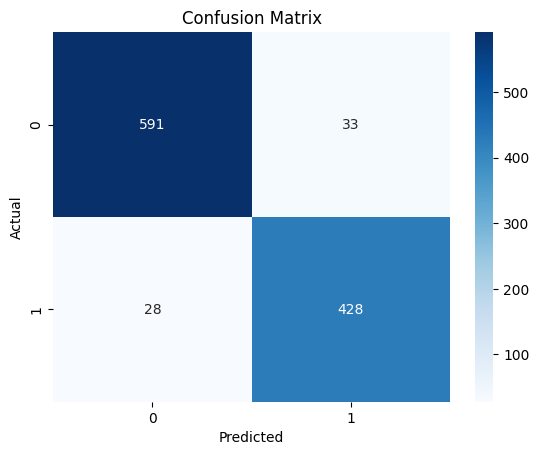

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 Biểu đồ Feature Importance

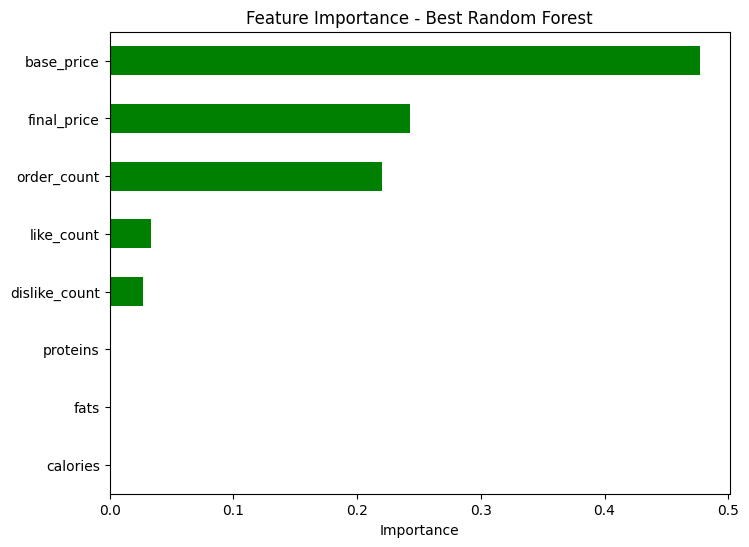

In [12]:
feat_importance = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(8, 6))
feat_importance.plot(kind='barh', color='green')
plt.title("Feature Importance - Best Random Forest")
plt.xlabel("Importance")
plt.show()

In [13]:
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🔥 Best Parameters:")
print(grid_search.best_params_)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy on test set: {acc:.4f} ({acc*100:.2f}%)")


🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       624
           1       0.93      0.94      0.93       456

    accuracy                           0.94      1080
   macro avg       0.94      0.94      0.94      1080
weighted avg       0.94      0.94      0.94      1080


🔥 Best Parameters:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
🎯 Accuracy on test set: 0.9435 (94.35%)


# 💸 4. Gradient Boosting Regressor – Dự đoán giá trị đơn hàng

In [14]:
# ✅ Chọn đặc trưng và nhãn
features = ['order_count', 'like_count', 'dislike_count', 'review_count', 'rating']
target = 'final_price'

# Loại bỏ dòng thiếu giá trị
df_reg = df[features + [target]].dropna()
X = df_reg[features]
y = df_reg[target]

# 🔍 Kiểm tra dữ liệu
print("✅ Số dòng dùng được:", X.shape[0])
print("🔸 Một vài dòng đầu:")
display(X.head())

# 📈 Huấn luyện Gradient Boosting + GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Tách tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Thiết lập tham số cho GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Huấn luyện mô hình
grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=cv, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# ✅ Đánh giá mô hình
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n🎯 MAE (Mean Absolute Error): {mae:.2f}")
print(f"📉 RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"📈 R-squared (R²): {r2:.2f}")


✅ Số dòng dùng được: 5397
🔸 Một vài dòng đầu:


,order_count,like_count,dislike_count,review_count,rating
27,24,0,0,144,4.7
28,24,0,0,144,4.7
29,24,0,0,144,4.7
30,24,0,0,144,4.7
31,24,0,0,144,4.7



🎯 MAE (Mean Absolute Error): 41864.00
📉 RMSE (Root Mean Squared Error): 3292502563.09
📈 R-squared (R²): 0.54


In [15]:
print("\n🔥 Best Parameters:")
print(grid.best_params_)



🔥 Best Parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


# Hiển thị mẫu 5 giá trị dự đoán:

In [16]:
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
display(comparison_df.head(5))


,Actual,Predicted
0,140000,219301.318109
1,120000,160483.519451
2,87000,94365.923612
3,245000,187592.204251
4,210000,219301.318109


# 🔍 Feature importance

/tmp/ipython-input-17-1799063781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


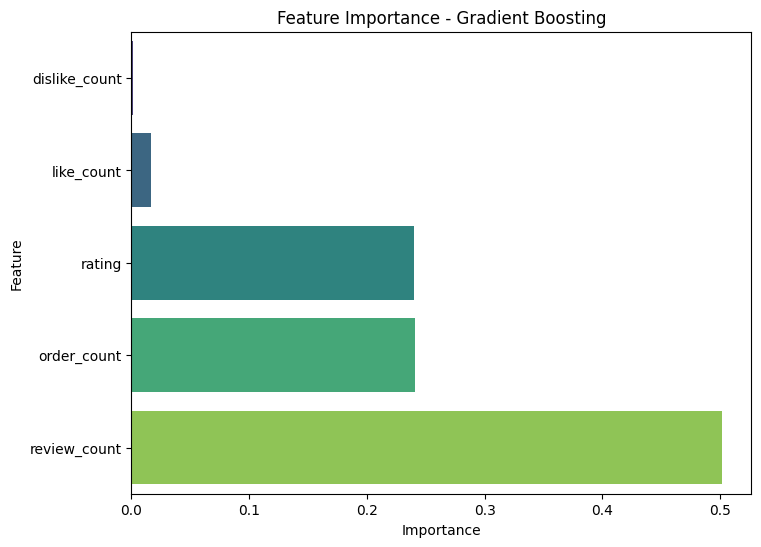

In [17]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 🔍 Biểu đồ Thực tế vs Dự đoán

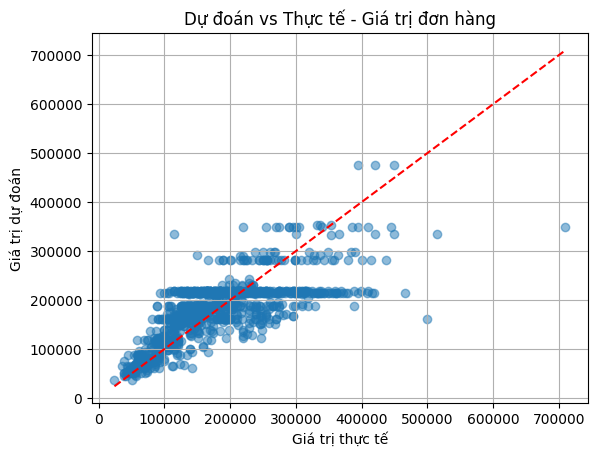

In [18]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Dự đoán vs Thực tế - Giá trị đơn hàng")
plt.grid(True)
plt.show()

# 📉 Phân phối sai số

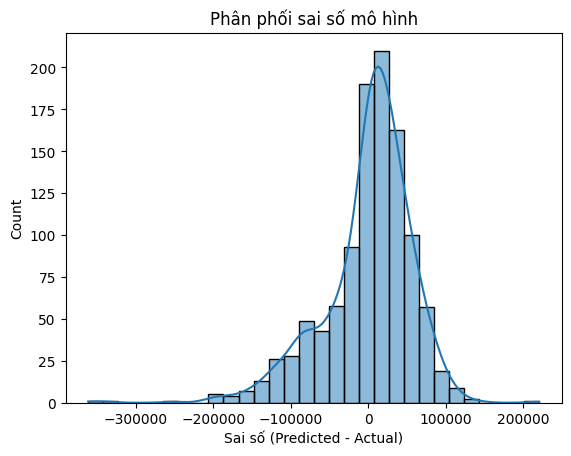

In [19]:
errors = y_pred - y_test
sns.histplot(errors, kde=True, bins=30)
plt.xlabel("Sai số (Predicted - Actual)")
plt.title("Phân phối sai số mô hình")
plt.show()

# 🧩 5. KMeans Clustering – Phân cụm người dùng

In [20]:
# ⚙️ 1. Mount và đọc CSV
import pandas as pd
import chardet
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Loại bỏ dữ liệu thiếu
df_clean = df.dropna(subset=['order_count', 'like_count', 'dislike_count', 'rating', 'review_count', 'calories', 'final_price'])

In [22]:
# Loại bỏ dữ liệu thiếu
df_clean = df.dropna(subset=['order_count', 'like_count', 'dislike_count', 'rating', 'review_count', 'calories', 'final_price'])

In [23]:
# 📌 3. Chọn các đặc trưng để phân cụm
features = ['order_count', 'like_count', 'dislike_count', 'rating', 'review_count', 'calories', 'final_price']
X = df_clean[features]

# 📌 4. Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lưu lại DataFrame để gán kết quả cụm sau này
df_cluster = df_clean.reset_index(drop=True).copy()

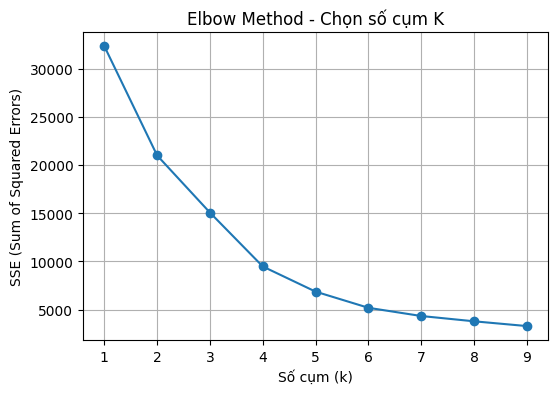

In [24]:
# 📌 5. Elbow Method để chọn số cụm K
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, sse, marker='o')
plt.title("Elbow Method - Chọn số cụm K")
plt.xlabel("Số cụm (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


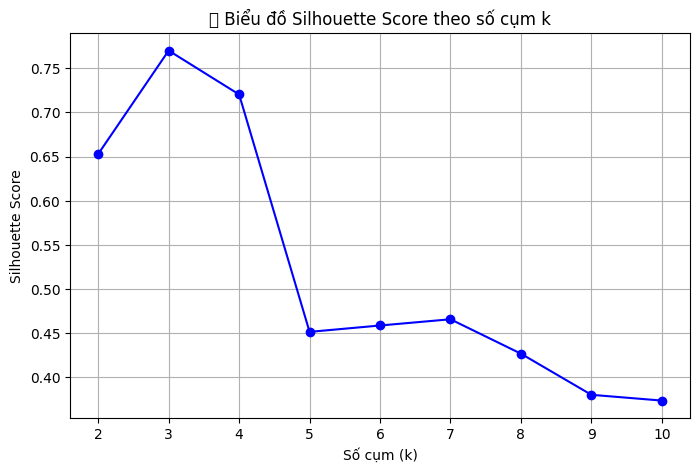

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sử dụng dữ liệu đã chuẩn hóa: X_scaled
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("🔍 Biểu đồ Silhouette Score theo số cụm k")
plt.grid(True)
plt.xticks(K)
plt.show()

In [25]:
# 📌 6. Silhouette Score để đánh giá số cụm
from sklearn.metrics import silhouette_score

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"🔸 K = {k} | Silhouette Score = {score:.3f}")


🔸 K = 2 | Silhouette Score = 0.810
🔸 K = 3 | Silhouette Score = 0.770
🔸 K = 4 | Silhouette Score = 0.720
🔸 K = 5 | Silhouette Score = 0.461
🔸 K = 6 | Silhouette Score = 0.466
🔸 K = 7 | Silhouette Score = 0.407
🔸 K = 8 | Silhouette Score = 0.427


In [34]:
# 📌 7. Huấn luyện mô hình KMeans với K=3 (lựa chọn tối ưu)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# 📌 8. Biểu đồ phân cụm (pairplot)
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_cluster.sample(500), hue='cluster', diag_kind='hist', palette='Set2')
plt.suptitle("Biểu đồ phân cụm khách hàng theo KMeans (k=3)", y=1.02)
plt.show()

# 📌 9. Phân tích trung bình đặc trưng theo cụm
features = ['final_price', 'calories', 'order_count', 'rating', 'review_count']
cluster_means = df_cluster.groupby('cluster')[features].mean()
print("📊 Trung bình đặc trưng theo cụm:")
print(cluster_means)

print("📊 Số lượng mẫu trong mỗi cụm:")
print(df_cluster['cluster'].value_counts())


Output hidden; open in https://colab.research.google.com to view.

✅ File kết quả đã được lưu: /content/drive/MyDrive/SICT_BigData/kmeans_cluster_k3.csv
🎯 Trung bình đặc trưng theo từng cụm:


,final_price,calories,order_count,rating,review_count
cluster,,,,,
0,184030.16,0.0,14.42,4.42,100.37
1,66755.88,0.0,452.01,4.80,7514.48
2,64687.50,0.0,3238.00,4.80,8510.00


📊 Tỷ lệ món Á theo cụm:


,tỷ lệ món Á (%)
cluster,
0,40.557276
1,100.000000
2,100.000000



🔢 Số lượng món ăn/khách hàng trong từng cụm:
cluster
0    5168
1     221
2       8
Name: count, dtype: int64


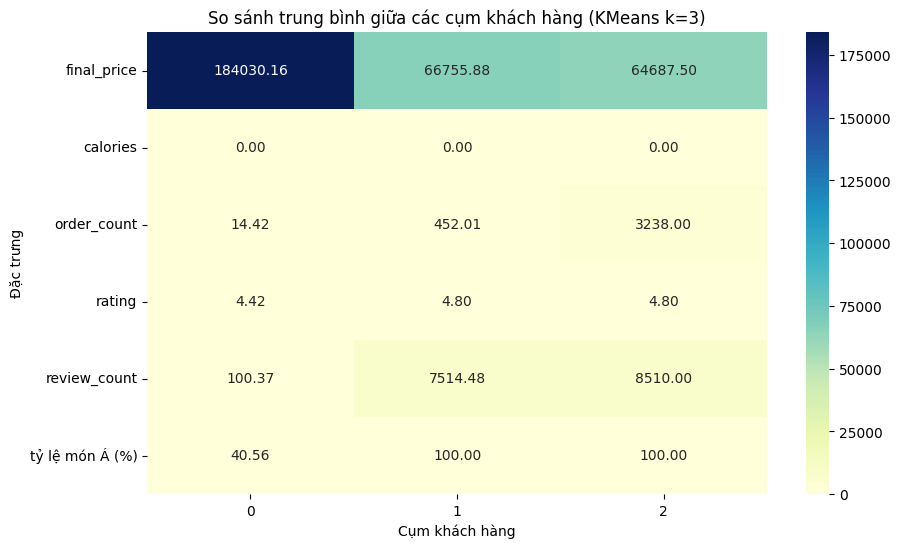

In [36]:
# 📌 10. Xuất file phân cụm
output_path = '/content/drive/MyDrive/SICT_BigData/kmeans_cluster_k3.csv'
df_cluster.to_csv(output_path, index=False)
print(f"✅ File kết quả đã được lưu: {output_path}")

# 📋 11. Phân tích ý nghĩa các cụm khách hàng (clusters)
cluster_info = df_cluster.groupby("cluster")[
    ['final_price', 'calories', 'order_count', 'rating', 'review_count']
].mean().round(2)

print("🎯 Trung bình đặc trưng theo từng cụm:")
display(cluster_info)

# Nếu đã có cột 'is_asian' từ gán nhãn trước đó (1 = món Á), tính tỷ lệ món Á theo cụm
if 'is_asian' in df_cluster.columns:
    asian_ratio = df_cluster.groupby("cluster")['is_asian'].mean().rename("tỷ lệ món Á (%)") * 100
    print("📊 Tỷ lệ món Á theo cụm:")
    display(asian_ratio)

    # Gộp các thống kê lại
    cluster_summary = pd.concat([cluster_info, asian_ratio], axis=1).round(2)
else:
    cluster_summary = cluster_info.copy()

print("\n🔢 Số lượng món ăn/khách hàng trong từng cụm:")
print(df_cluster['cluster'].value_counts().sort_index())

# 📈 Vẽ heatmap so sánh đặc trưng giữa các cụm
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("So sánh trung bình giữa các cụm khách hàng (KMeans k=3)")
plt.ylabel("Đặc trưng")
plt.xlabel("Cụm khách hàng")
plt.show()